In [1]:
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL

import tensorflow as tf
from tensorflow import keras

In [2]:
batch_size = 32
img_height = 128
img_width = 128
directory = "Dataset/"

In [3]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="training",
  seed=9,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8982 files belonging to 3 classes.
Using 7186 files for training.


In [4]:
model = load_model('my_model.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)       

In [5]:
class_names = train_dataset.class_names
print(class_names)

['mask_weared_incorrect', 'with_mask', 'without_mask']


In [6]:
from IPython.display import display
from PIL import Image 
%matplotlib inline

Are you uploading a URL or a file? (u/f): 
u
type url here: 
https://images.perthnow.com.au/publication/B881944284Z/1627266951359_GQ33CS4UH.3-1.jpg?imwidth=668&impolicy=pn_v3
3 faces detected


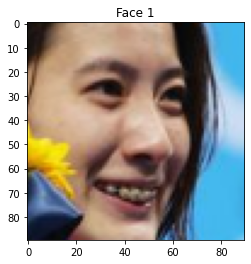

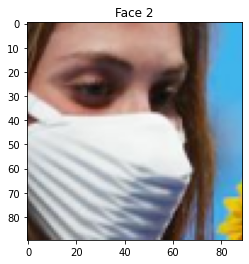

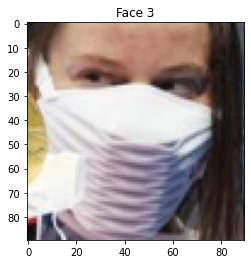

In [7]:
import face_detection

['1.png', '2.png', '3.png']


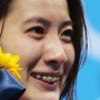

1.png most likely belongs to without_mask with a 100.00 percent confidence.


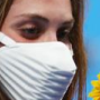

2.png most likely belongs to with_mask with a 100.00 percent confidence.


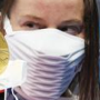

3.png most likely belongs to with_mask with a 100.00 percent confidence.


In [8]:
for folder,subfolder,items in os.walk('web_faces_to_test/'):
    
#     print(folder)
#     print(subfolder)
    print(items)
    
    for pic in items:
        
        test_image = folder+pic
        display_image = PIL.Image.open(test_image)
        width, height = display_image.size
        if (width < 100) or (height < 100):
            display_image = display_image.resize((100,100))
        else:
            pass
            
        display(display_image)
        
        img = keras.preprocessing.image.load_img(
        test_image, target_size=(img_height, img_width)
        )
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) # Create a batch
        predictions = model.predict(img_array)
        score = tf.nn.softmax(predictions[0])
        print(
            pic+" most likely belongs to {} with a {:.2f} percent confidence."
            .format(class_names[np.argmax(score)], 100 * np.max(score))
        )

In [9]:
#This removes all images from web_faces_to_test directory.

clear_folder = input('Do you wish to delete all images from the web_faces_to_test directory? (y/n)')
if clear_folder.lower() == 'y':
    for a in os.walk('web_faces_to_test'):
        for pic in a[2]:
            os.remove(a[0]+"/"+pic)
else:
    print('Directory was not cleared')

Do you wish to delete all images from the web_faces_to_test directory? (y/n)y
